In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson, Binomial
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
# Set random seed for reproducibility
np.random.seed(42)

# ============================================================================
# EXAMPLE 1: POISSON REGRESSION
# ============================================================================
# Use case: Predicting count data (e.g., number of customer visits per day)

print("="*70)
print("POISSON REGRESSION EXAMPLE")
print("="*70)

# Generate synthetic data
n_samples = 500
X_pois = np.random.randn(n_samples, 2)
# True coefficients
beta_pois = np.array([0.5, -0.3])
# Linear predictor
eta = 2 + X_pois @ beta_pois
# Expected count (lambda parameter)
lambda_true = np.exp(eta)
# Generate Poisson-distributed counts
y_pois = np.random.poisson(lambda_true)

# Create DataFrame
df_pois = pd.DataFrame({
    'advertising_spend': X_pois[:, 0],
    'competitor_activity': X_pois[:, 1],
    'customer_visits': y_pois
})

print("\nFirst few rows of Poisson data:")
print(df_pois.head())
print(f"\nBasic statistics of customer visits:")
print(df_pois['customer_vbisits'].describe())


POISSON REGRESSION EXAMPLE

First few rows of Poisson data:
   advertising_spend  competitor_activity  customer_visits
0           0.496714            -0.138264                6
1           0.647689             1.523030               11
2          -0.234153            -0.234137                5
3           1.579213             0.767435                9
4          -0.469474             0.542560                5

Basic statistics of customer visits:
count    500.000000
mean       8.490000
std        5.954899
min        0.000000
25%        5.000000
50%        7.000000
75%       11.000000
max       42.000000
Name: customer_visits, dtype: float64


<Axes: >

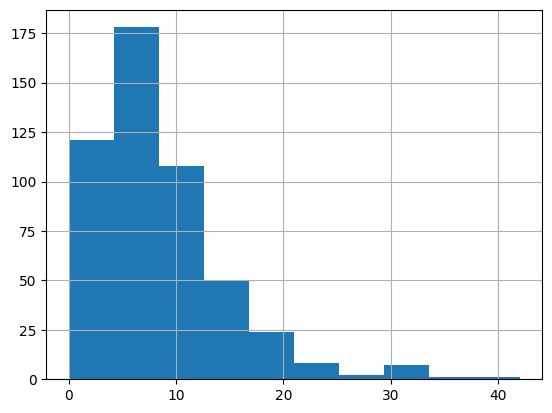

In [4]:
df_pois.customer_visits.hist()


POISSON MODEL SUMMARY
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  500
Model:                            GLM   Df Residuals:                      497
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                          12.357
Method:                          IRLS   Log-Likelihood:                -1336.5
Date:                Tue, 07 Oct 2025   Deviance:                       6141.6
Time:                        12:41:28   Pearson chi2:                 6.14e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8459
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5590      0.

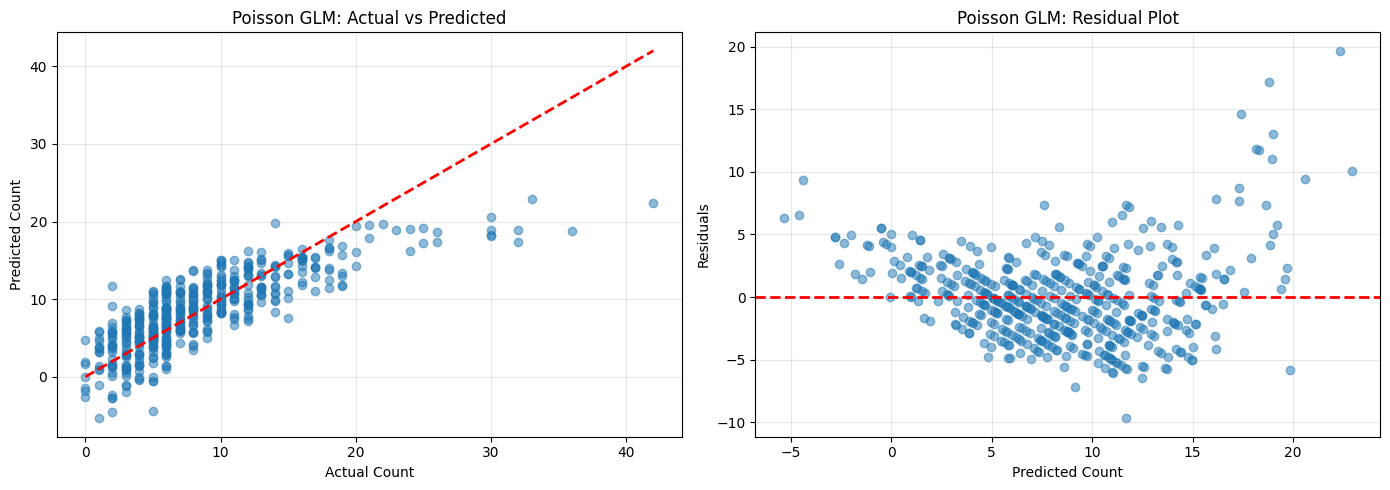

In [19]:

# Fit Poisson GLM
X_pois_model = sm.add_constant(X_pois)
poisson_model = sm.GLM(y_pois, X_pois_model, family=Gaussian())
poisson_results = poisson_model.fit()

print("\n" + "="*70)
print("POISSON MODEL SUMMARY")
print("="*70)
print(poisson_results.summary())

# Predictions
y_pred_pois = poisson_results.predict(X_pois_model)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Actual vs Predicted
axes[0].scatter(y_pois, y_pred_pois, alpha=0.5)
axes[0].plot([y_pois.min(), y_pois.max()], 
             [y_pois.min(), y_pois.max()], 
             'r--', lw=2)
axes[0].set_xlabel('Actual Count')
axes[0].set_ylabel('Predicted Count')
axes[0].set_title('Poisson GLM: Actual vs Predicted')
axes[0].grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = y_pois - y_pred_pois
axes[1].scatter(y_pred_pois, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Count')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Poisson GLM: Residual Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('poisson_glm.png', dpi=100, bbox_inches='tight')
print("\nPoisson GLM plots saved as 'poisson_glm.png'")


In [14]:

# ============================================================================
# EXAMPLE 2: LOGISTIC REGRESSION
# ============================================================================
# Use case: Binary classification (e.g., customer churn prediction)

print("\n\n" + "="*70)
print("LOGISTIC REGRESSION EXAMPLE")
print("="*70)

# Generate synthetic data
n_samples = 1000
X_log = np.random.randn(n_samples, 3)
# True coefficients
beta_log = np.array([1.5, -0.8, 0.6])
# Linear predictor
eta_log = -1 + X_log @ beta_log
# Probability of success
prob_true = 1 / (1 + np.exp(-eta_log))
# Generate binary outcomes
y_log = np.random.binomial(1, prob_true)

# Create DataFrame
df_log = pd.DataFrame({
    'account_age': X_log[:, 0],
    'support_tickets': X_log[:, 1],
    'usage_frequency': X_log[:, 2],
    'churned': y_log
})

print("\nFirst few rows of Logistic data:")
print(df_log.head())
print(f"\nClass distribution:")
print(df_log['churned'].value_counts())
print(f"Churn rate: {y_log.mean():.2%}")




LOGISTIC REGRESSION EXAMPLE

First few rows of Logistic data:
   account_age  support_tickets  usage_frequency  churned
0    -1.561493         1.503420        -0.330120        0
1    -0.211667        -0.627734        -0.288039        0
2     1.418531        -2.487809         1.276965        1
3     0.338023        -1.207022        -1.075312        0
4     1.676393        -0.945507        -1.153351        1

Class distribution:
churned
0    671
1    329
Name: count, dtype: int64
Churn rate: 32.90%


<Axes: >

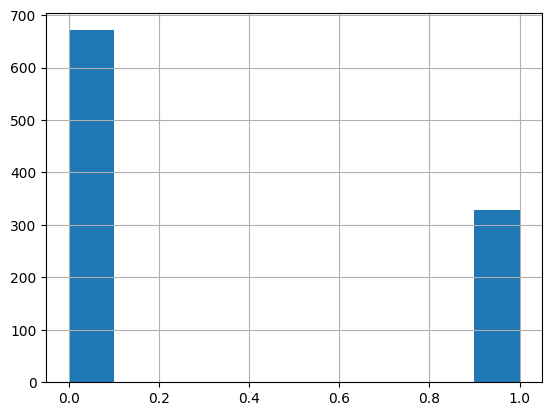

In [15]:
df_log.churned.hist()

In [22]:
mean_absolute_percentage_error(y_pois, y_pred_pois)

128671259636243.23


LOGISTIC MODEL SUMMARY
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  700
Model:                            GLM   Df Residuals:                      696
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -310.97
Date:                Tue, 07 Oct 2025   Deviance:                       621.94
Time:                        12:39:00   Pearson chi2:                     731.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3075
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1804      0

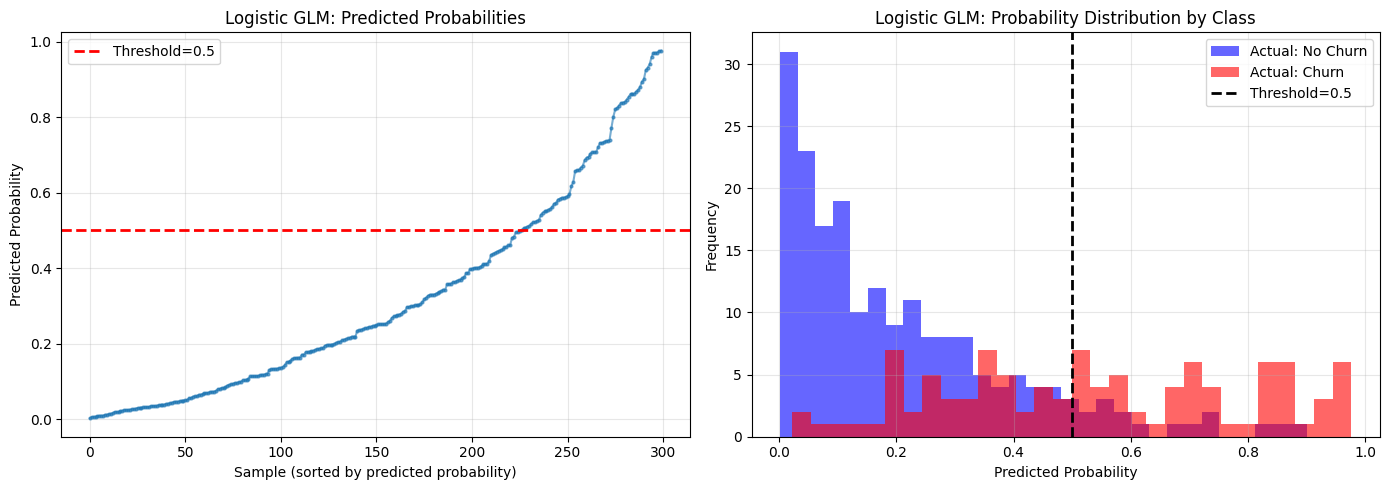

In [18]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_log, y_log, test_size=0.3, random_state=42
)

# Fit Logistic GLM
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

logistic_model = sm.GLM(y_train, X_train_const, family=Binomial())
logistic_results = logistic_model.fit()

print("\n" + "="*70)
print("LOGISTIC MODEL SUMMARY")
print("="*70)
print(logistic_results.summary())

# Predictions
y_pred_prob = logistic_results.predict(X_test_const)
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Model evaluation
print("\n" + "="*70)
print("LOGISTIC MODEL EVALUATION")
print("="*70)
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_class)
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

# Calculate odds ratios
odds_ratios = np.exp(logistic_results.params)
print("\nOdds Ratios:")
for name, or_val in zip(['Intercept', 'Feature 1', 'Feature 2', 'Feature 3'], 
                         odds_ratios):
    print(f"{name}: {or_val:.3f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: ROC-like visualization
sorted_idx = np.argsort(y_pred_prob)
axes[0].plot(y_pred_prob[sorted_idx], marker='o', markersize=2, alpha=0.6)
axes[0].axhline(y=0.5, color='r', linestyle='--', lw=2, label='Threshold=0.5')
axes[0].set_xlabel('Sample (sorted by predicted probability)')
axes[0].set_ylabel('Predicted Probability')
axes[0].set_title('Logistic GLM: Predicted Probabilities')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Probability distribution by actual class
axes[1].hist(y_pred_prob[y_test == 0], bins=30, alpha=0.6, 
             label='Actual: No Churn', color='blue')
axes[1].hist(y_pred_prob[y_test == 1], bins=30, alpha=0.6, 
             label='Actual: Churn', color='red')
axes[1].axvline(x=0.5, color='black', linestyle='--', lw=2, 
                label='Threshold=0.5')
axes[1].set_xlabel('Predicted Probability')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Logistic GLM: Probability Distribution by Class')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('logistic_glm.png', dpi=100, bbox_inches='tight')
print("\nLogistic GLM plots saved as 'logistic_glm.png'")

print("\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)